# GGplot Recipes
Recipes for Explodatory Data Analysis by means of plots

- toc: true 
- badges: true
- comments: false
- categories: [r][ggplot]


*TOC*
* write a function for generating data
* use of melt for rearranging data
* create a base plot 
* add a boxplot to the base plot
* add a jiiter plot to the base plot
* merge boxplot and jiiter plot
* use different color schemes using color brewer package
* add a label to selected points in the jiiter plot
* use ggrepel to better visualize the label
* write a function to automatically select points based on a custom filter
* perform a t.test on data and use ggpubr to add brackets to a boxplot


Warning message in melt.data.table(dt):
"id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns [id, ...]. Consider providing at least one of 'id' or 'measure' vars in future."


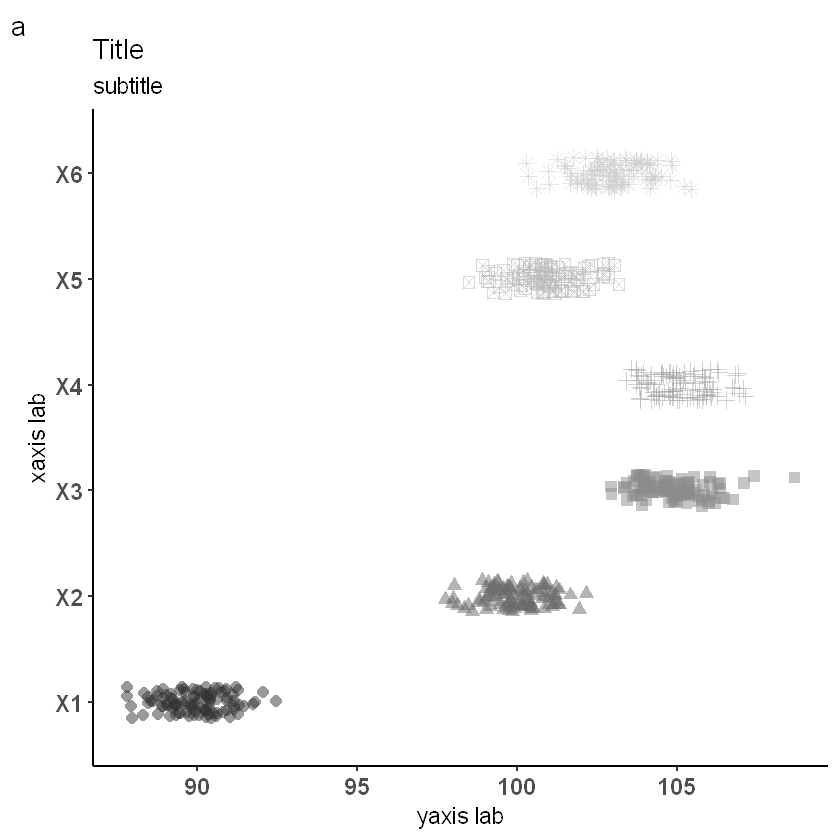

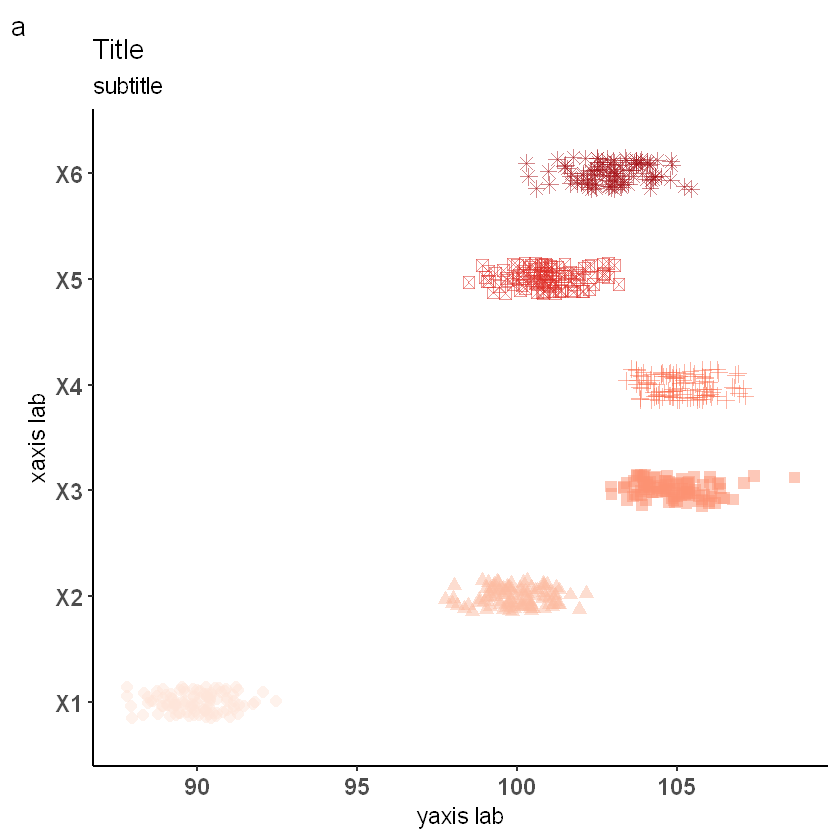

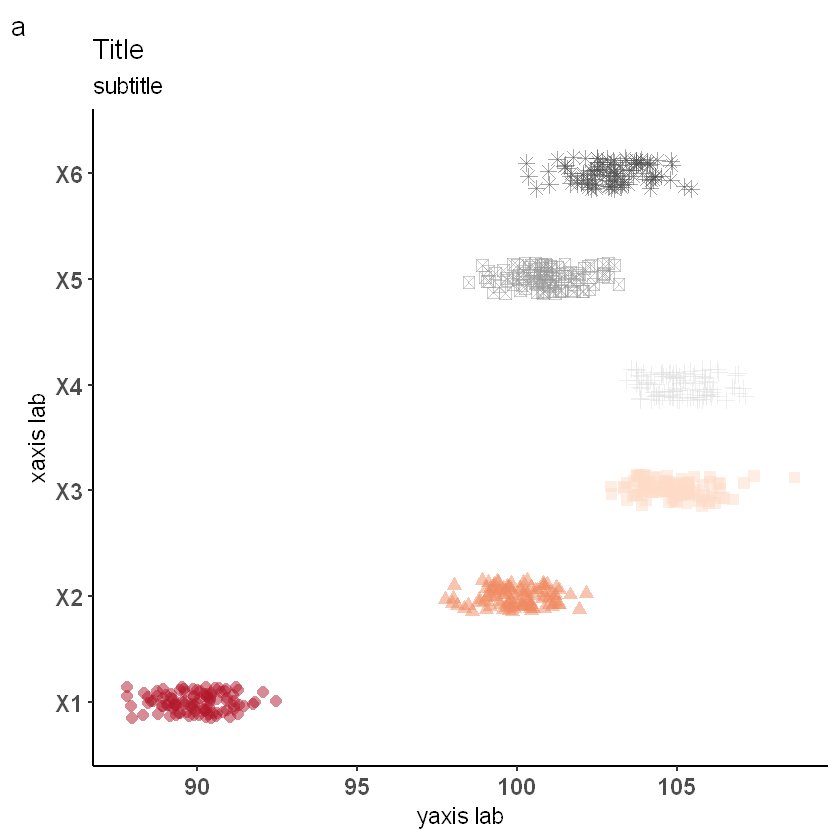

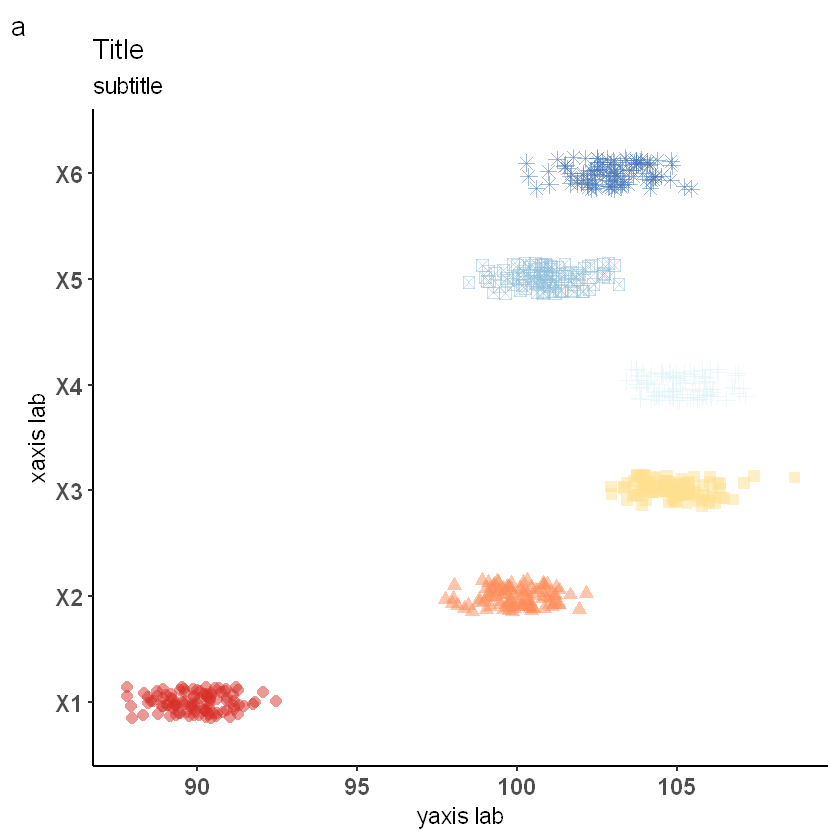

In [2]:
# loading libraries

library(ggplot2)
library(gridExtra)
library(data.table)
library(RColorBrewer)
library(ggpubr)
library(rstatix)
library(ggrepel)

# building a function for generating data

genDataset <- function(number_of_rows,means,sds)
{
l <- length(means)
res <- lapply(seq(1:l),function(x) eval(parse(text=paste("rnorm(",number_of_rows,",",means[x],")",sep="")))) 
data.frame((sapply(res,c)))
return(res)
}

# generating data

dat <- genDataset(number_of_rows=100,
				  means=c(90,100,105,105,101,103),
				  sds=c(30,20,25,30,30,30))
				  
dat <- data.frame((sapply(dat,c)))
id <- rownames(dat)
dat <-  cbind(id=id,dat)
dt <- data.table(dat)

# rearranging table using melt from data.table 
dt.melt <- melt(dt)
colnames(dt.melt) <- c("id","category","var1")


#creating base plot
base <- ggplot(dt.melt, aes(x=category, y=var1))			+
		labs(title = "Title",
			 x     = "xaxis lab",
             y     = "yaxis lab",
             subtitle = "subtitle",
             tag = "a")										+
		     theme_classic(base_size = 14)					+
			 theme(legend.position = "none",
			 axis.text.x = element_text(size=14,face="bold"),
			 axis.text.y = element_text(size=14,face="bold"))
			 
#adding jiitter plot
pv  <- base + geom_jitter(
			 position = position_jitter(0.15),
			 alpha=0.5,, size = 3) 

ph  <- pv + coord_flip() 
pvc <- pv + aes(shape = category)			
phc <- pvc + coord_flip() 

# preparing plot variations according to sequential,
# diverging and qualitative scheme colors using color brewer

pvc_grey 	   <- pvc + aes(color = category) + 	scale_color_grey()
pvc_sequential  <- pvc + aes(color = category) + 	scale_color_brewer(palette="Reds")
pvc_diverging   <- pvc + aes(color = category) + 	scale_color_brewer(palette="RdGy")
pvc_qualitative <- pvc + aes(color = category) + 	scale_color_brewer(palette="RdYlBu")

phc_grey 	   <- phc + aes(color = category) + 	scale_color_grey()
phc_sequential  <- phc + aes(color = category) + 	scale_color_brewer(palette="Reds")
phc_diverging   <- phc + aes(color = category) + 	scale_color_brewer(palette="RdGy")
phc_qualitative <- phc + aes(color = category) + 	scale_color_brewer(palette="RdYlBu")

#visualizing the plot
phc_grey
phc_sequential 
phc_diverging
phc_qualitative


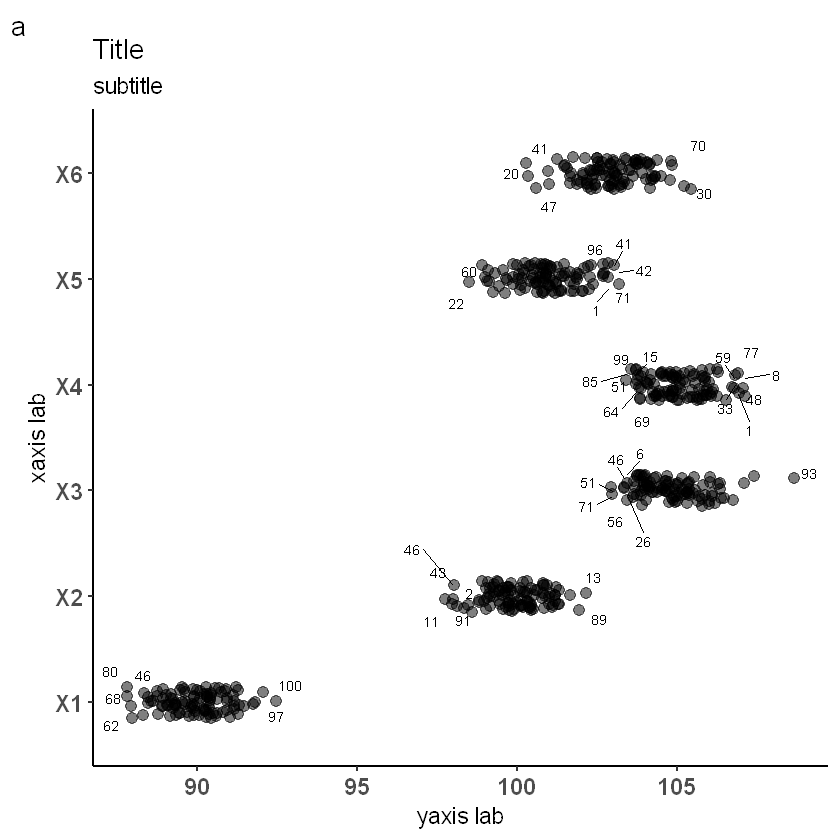

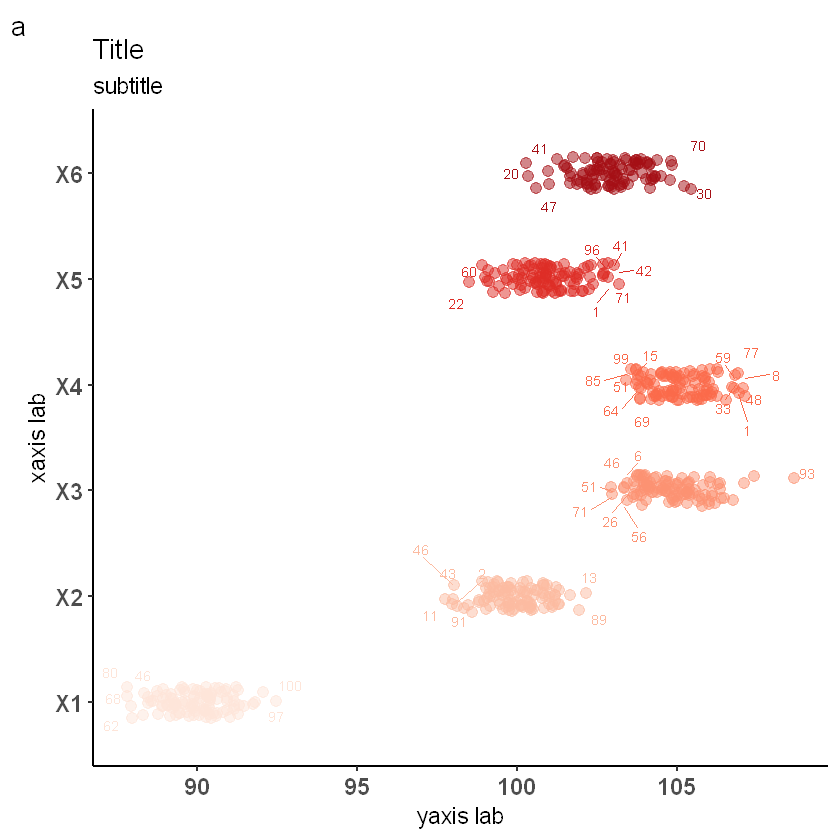

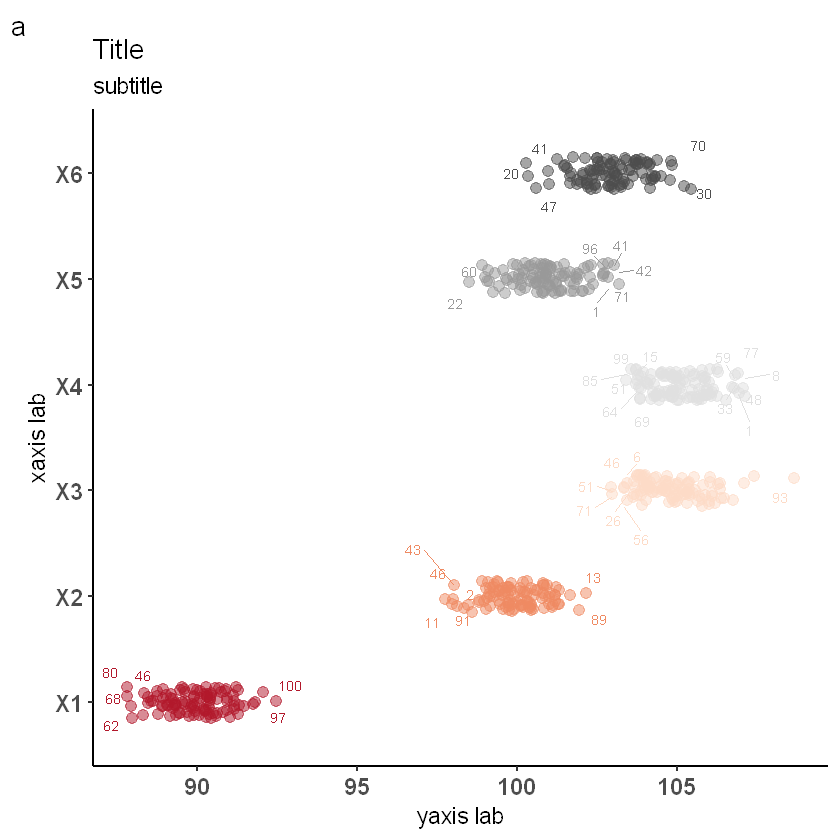

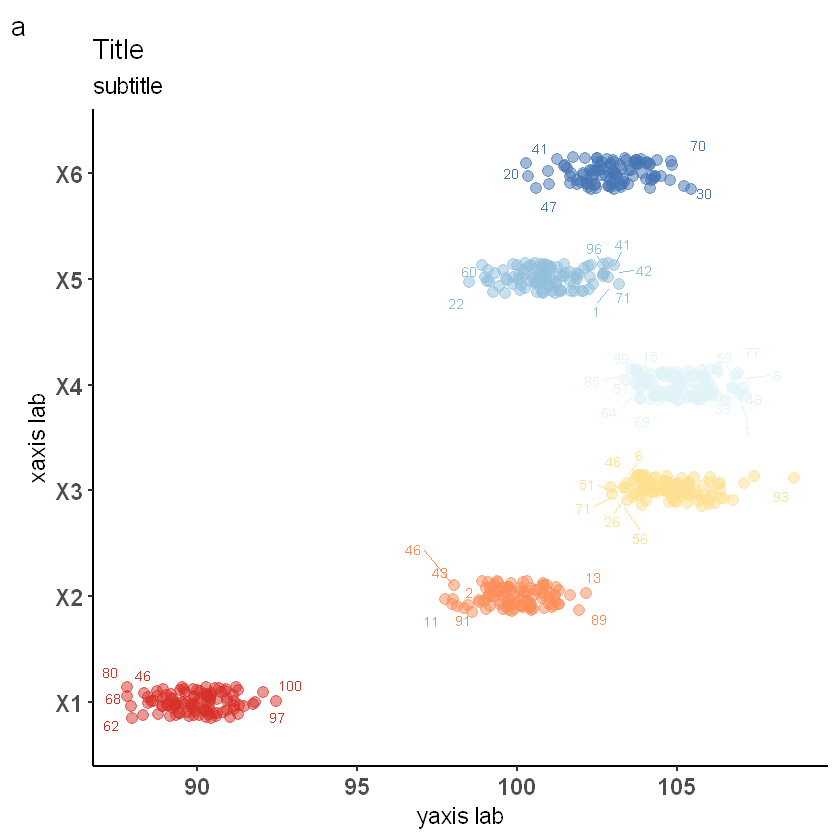

In [3]:
# adding labels to selected points

uplim  <- 92
lowlim <- 88

#using gg_text_repel in order to better visualize the labels

p2 <- ph +  geom_text_repel(data=dt.melt[category=="X1"],aes(label=ifelse(((var1 > uplim | var1 < lowlim )),as.character(id),'')),position = position_jitter(0.2,seed = 1),size=3) 
p2_sequential  <- p2 + aes(color = category) + 	scale_color_brewer(palette="Reds")
p2_diverging   <- p2 + aes(color = category) + 	scale_color_brewer(palette="RdGy")
p2_qualitative <- p2 + aes(color = category) + 	scale_color_brewer(palette="RdYlBu")  

# making the process automatic

# creating functions to highlight data depending on n sigma or
# a delta from the min and max 

NormTextlim <- function(x, nsigma){
					limup   <- mean(x)  + nsigma*sd(x)
					limlow  <- mean(x) - nsigma*sd(x)
					l       <- list("limup"=limup,"limlow"=limlow)
					return(l)
					}
					
Utextlim <- function(x, ndiv){
					nth_div <- (max(x)-min(x))/ndiv
					limup   <- max(x)  - nth_div
					limlow  <- min(x)  + nth_div
					l       <- list("limup"=limup,"limlow"=limlow)
					return(l)
					}

# creating a category index
unique_category <- unique(dt.melt$category)		
	

p3 <- ph +
	  lapply(seq(1,length(unique_category)), 
	  function(x) 
	  geom_text_repel(data=dt.melt[category==as.character(unique_category[x])],
	  aes(label=ifelse(((var1 > Utextlim((dt.melt[category==as.character(unique_category[x])])$var1,10)$limup | var1 < Utextlim((dt.melt[category==as.character(unique_category[x])])$var1,10)$limlow )),
	  as.character(id),'')),
	  position = position_jitter(0.2,seed = 1),size=3)) 
	  
p3_sequential  <- p3 + aes(color = category) + 	scale_color_brewer(palette="Reds")
p3_diverging   <- p3 + aes(color = category) + 	scale_color_brewer(palette="RdGy")
p3_qualitative <- p3 + aes(color = category) + 	scale_color_brewer(palette="RdYlBu")  

p3
	  
p3_sequential  
p3_diverging   
p3_qualitative 

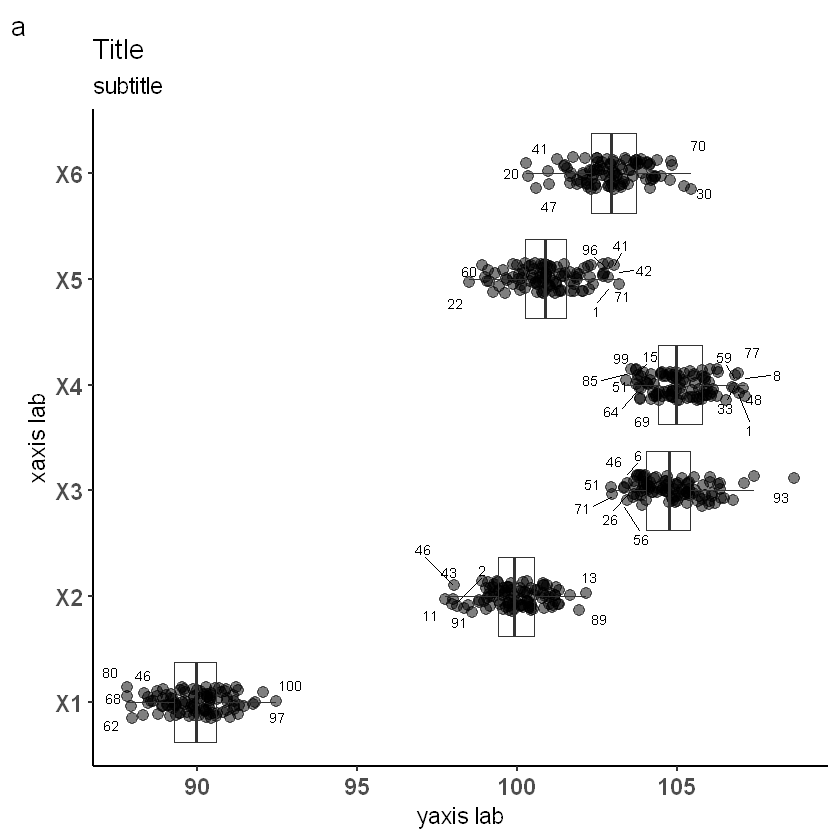

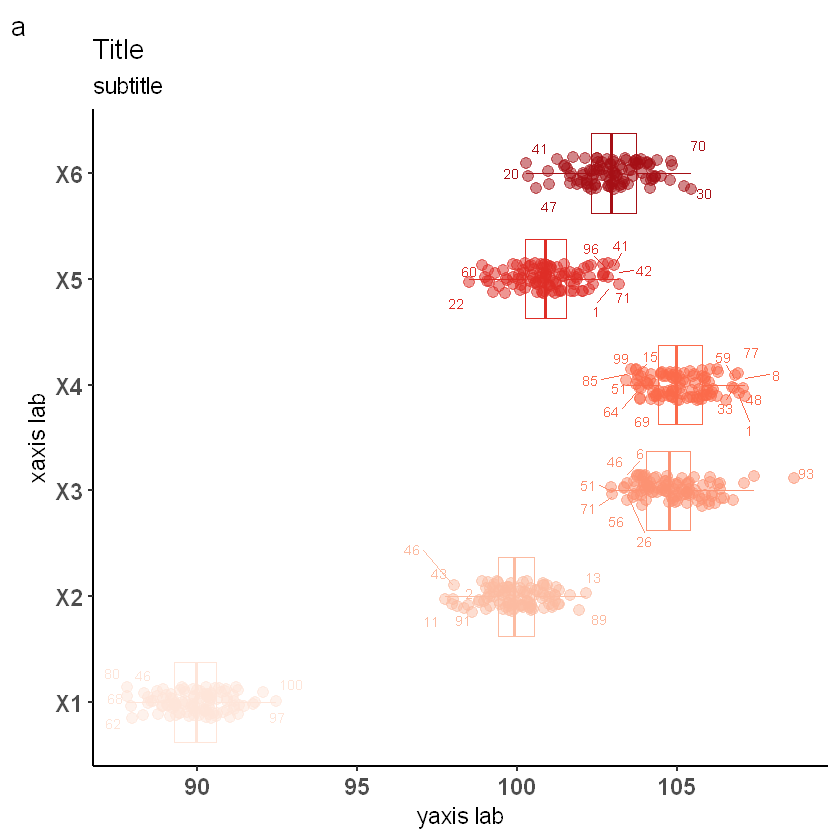

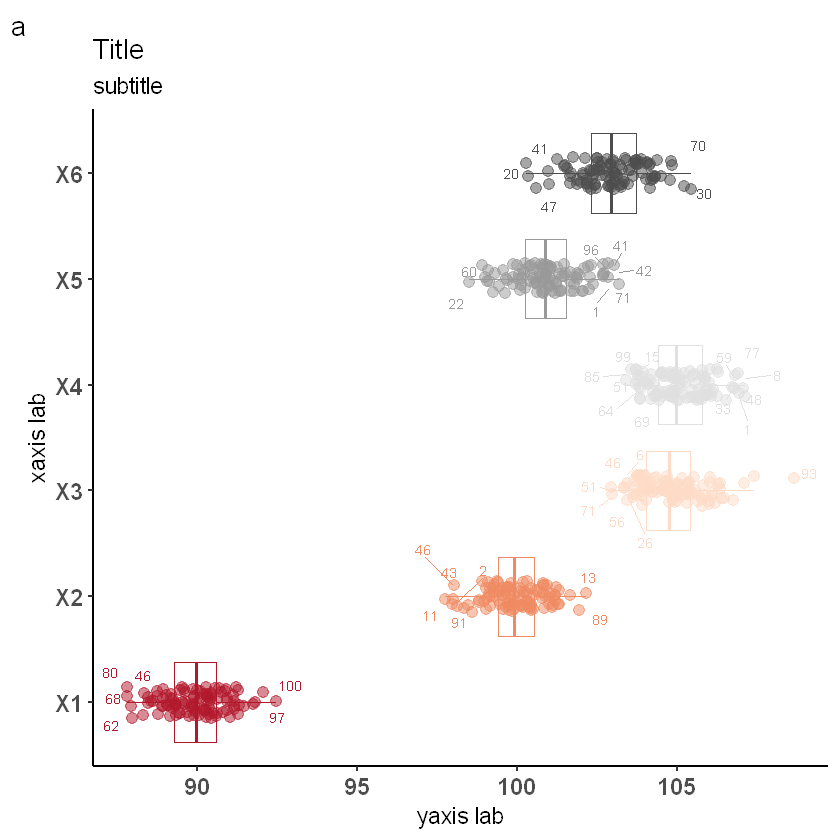

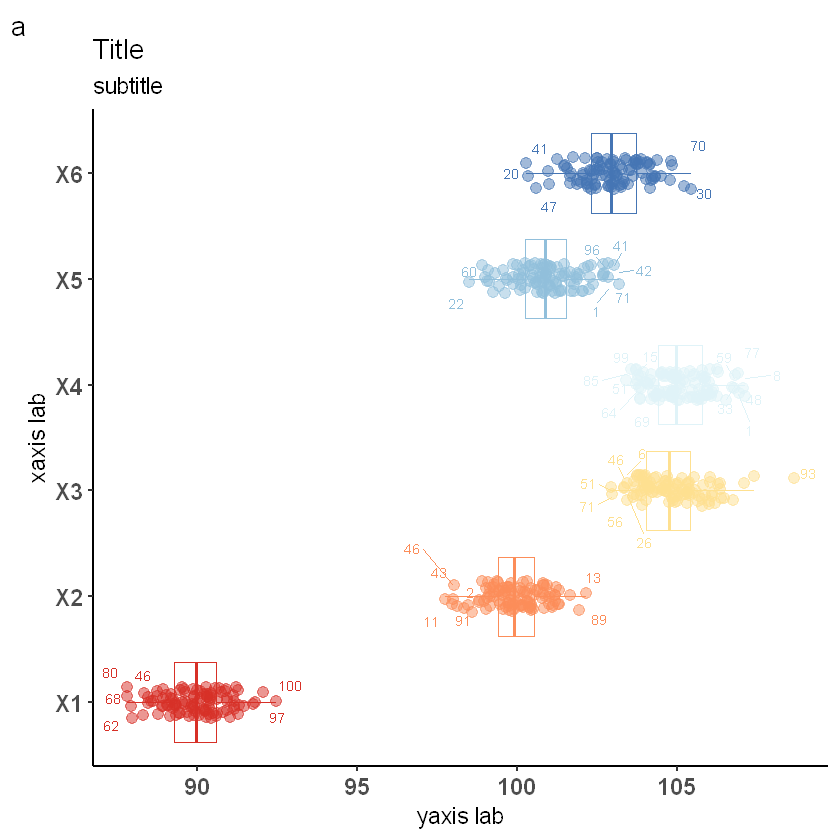

In [5]:
# adding a boxplot

p4 <- p3 + geom_boxplot(alpha = 0)
p4_sequential  <- p4 + aes(color = category) + 	scale_color_brewer(palette="Reds")
p4_diverging   <- p4 + aes(color = category) + 	scale_color_brewer(palette="RdGy")
p4_qualitative <- p4 + aes(color = category) + 	scale_color_brewer(palette="RdYlBu")  

# different color schemes
p4 
p4_sequential  
p4_diverging   
p4_qualitative 

Warning message in melt.data.table(dt):
"id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns [id, ...]. Consider providing at least one of 'id' or 'measure' vars in future."


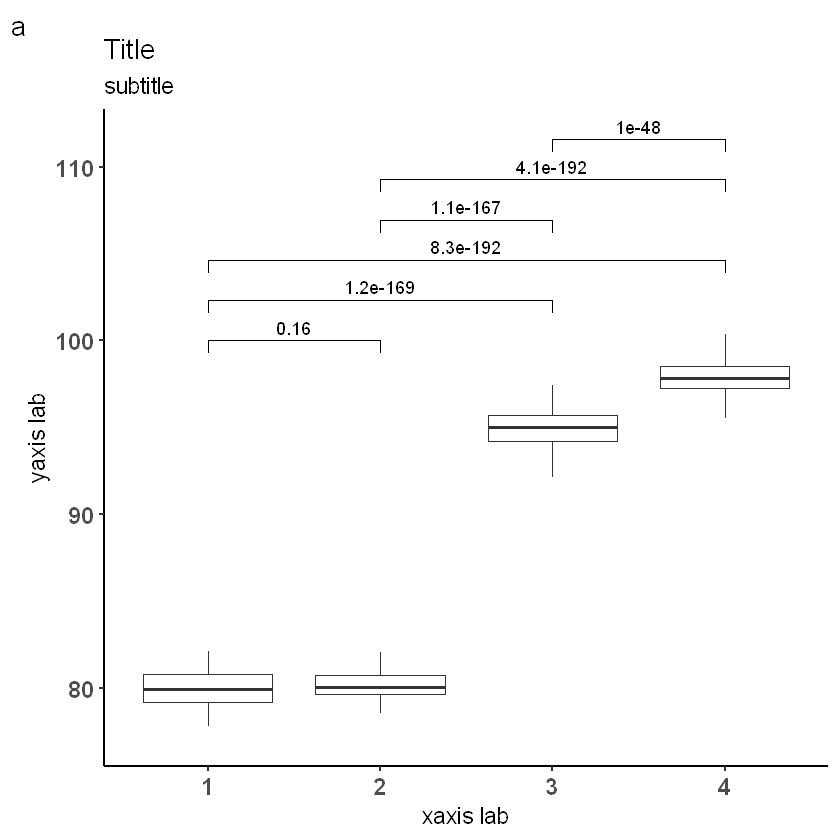

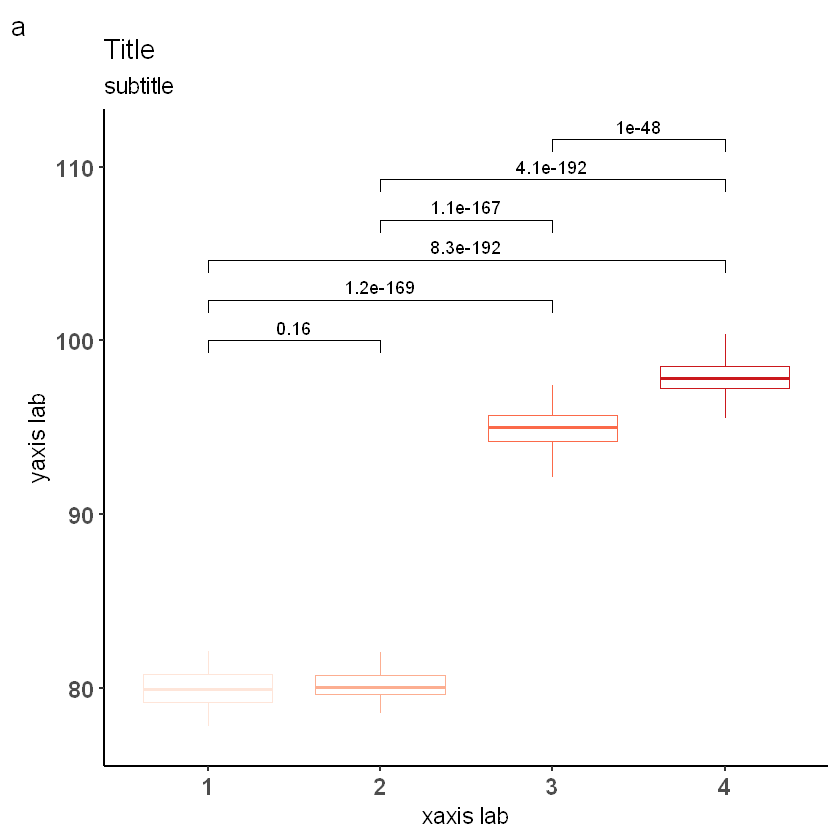

In [7]:

library(dplyr) 
library(rstatix)
#to later use the %>% operator and using a pipe friendly framework to
#perform t-tests

#generating a new dataset

dat <- genDataset(number_of_rows=100,means=c(80,80,95,98),sds=c(5,5,1,1))
dat <- data.frame((sapply(dat,c)))
id <- rownames(dat)
dat <-  cbind(id=id,dat)
dt <- data.table(dat)

# rearranging our table using melt
dt.melt <- melt(dt)
colnames(dt.melt) <- c("id","category","var1")
dt.melt$ncat <- as.numeric(dt.melt$category)

# performing statistical analysis
# WARNING: be sure that criteria for applying the test
# are met

stat.test <- dt.melt %>% t_test(var1 ~ ncat)

#loading library for plot with brackets
library(ggpubr)

#finding the max height for the brackets 
maxy <- round(max(dt.melt$var1))


# creating the boxplot 

base2 <- ggplot(dt.melt, aes(x=factor(ncat), y=var1))  		+
		labs(title = "Title",							
			 x     = "xaxis lab",						
             y     = "yaxis lab",						
             subtitle = "subtitle",							
             tag = "a")     				 				+
		     theme_classic(base_size = 14) 		        	+
			 theme(legend.position = "none",
			 axis.text.x = element_text(size=14,face="bold"),
			 axis.text.y = element_text(size=14,face="bold"))

pbox <- base2 + geom_boxplot(alpha = 0)

#Since we don't want the bracked to be colored we need to prepare
#the colored boxplot BEFORE applying the brackets

pbox_sequential  <- pbox + aes(color = factor(ncat)) + 	scale_color_brewer(palette="Reds")
pbox_diverging   <- pbox + aes(color = factor(ncat)) + 	scale_color_brewer(palette="RdGy")
pbox_qualitative <- pbox + aes(color = factor(ncat)) + 	scale_color_brewer(palette="RdYlBu")  

p5  <- pbox + geom_bracket(
    aes(xmin = group1, xmax = group2, label = signif(p, 2)),
    data = stat.test, y.position = maxy, step.increase = 0.1
  )

# IMPORTANT: need to specify that we do not want to inherit.aes

p5_sequential <- pbox_sequential + geom_bracket( inherit.aes = FALSE, 
	aes(
	xmin = group1,
	xmax = group2,
	label = signif(p, 2)),
    data = stat.test,
	y.position = maxy,
	step.increase = 0.1)


p5_diverging <- pbox_diverging + geom_bracket( inherit.aes = FALSE, 
	aes(
	xmin = group1,
	xmax = group2,
	label = signif(p, 2)),
    data = stat.test,
	y.position = maxy,
	step.increase = 0.1
	)

 
p5_qualitative <- pbox_qualitative + geom_bracket( inherit.aes = FALSE, 
	aes(
	xmin = group1,
	xmax = group2,
	label = signif(p, 2)),
    data = stat.test,
	y.position = maxy,
	step.increase = 0.1
	)
	


p5   

p5_sequential 

